In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from adjustText import adjust_text
from matplotlib import ticker

In [3]:
df = pd.read_csv("overlap.csv")#[:14]
df

,lang,type,overlap__ind,overlap__eng,overlap__ind__pct,overlap__eng__pct,token_size,token_size__normalized,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,nia,Wikipedia,0.2745,0.2848,27.45,28.48,246643,500000,NaN,NaN,NaN
1,bew,NusaParagraph,0.4385,0.2163,43.85,21.63,1164932,5000000,NaN,NaN,NaN
2,rej,NusaParagraph,0.3542,0.2390,35.42,23.90,156900,500000,NaN,500000.0,18.0
3,mad,NusaParagraph,0.3074,0.2556,30.74,25.56,573833,1000000,NaN,1000000.0,7.0
4,min,NusaParagraph,0.4166,0.2570,41.66,25.70,960961,1000000,NaN,5000000.0,4.0
5,bug,NusaParagraph,0.3116,0.2571,31.16,25.71,118392,500000,NaN,10000000.0,3.0
6,jav,NusaParagraph,0.4180,0.2628,41.80,26.28,1116678,5000000,NaN,NaN,NaN
7,sun,NusaParagraph,0.4045,0.2654,40.45,26.54,1111848,5000000,NaN,NaN,NaN
8,mak,NusaTranslation,0.2316,0.2665,23.16,26.65,191528,500000,NaN,NaN,NaN
9,bew,NusaTranslation,0.4260,0.2665,42.60,26.65,209867,500000,NaN,NaN,NaN


In [4]:
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

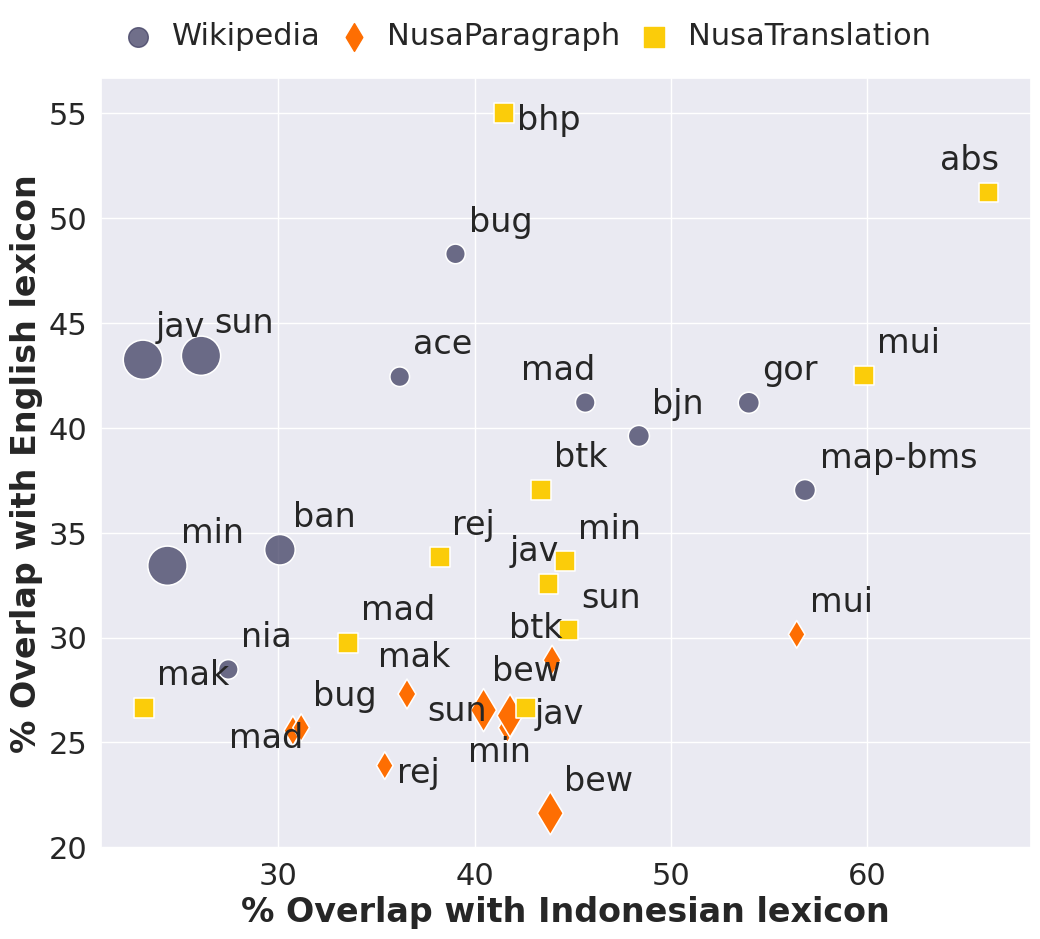

In [5]:
sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
sns.set_style("darkgrid")
# sns.set(rc={'axes.facecolor':'#dddddd'})
plt.figure(figsize=(12,10))

sns.set(font_scale=2)

x = "overlap__ind__pct"
y = "overlap__eng__pct"

plot = sns.scatterplot(
    data=df, x=x, y=y, hue="type", style="type", size="token_size__normalized",
    legend="auto", sizes=(200, 800), markers={"Wikipedia": "o", "NusaParagraph": "d", "NusaTranslation": "s"},
    palette=["#3c3b5fbb", "#fe6e02ff", "#fbcc0aff"],
    # palette=["#1f2a4daa", "#fe6e02aa", "#fbcc0aaa"],
)

# plot = sns.scatterplot(
#     data=df, x=x, y=y, hue="type", style="type", legend="auto", palette="magma",
# )

# Add text besides each point
texts = [plt.text(df[x][line]+0.6, df[y][line]+0.6, df["lang"][line]) for line in range(df.shape[0])]
adjust_text(texts) # arrowprops=dict(arrowstyle='->', color='red'))

# plot.xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
# plot.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
plot.xaxis.set_minor_locator(ticker.AutoMinorLocator())
plot.yaxis.set_minor_locator(ticker.AutoMinorLocator())

handles, labels = plot.get_legend_handles_labels()
used_handles, used_labels = [], []
for i, (h, l) in enumerate(zip(handles, labels)):
    if l not in ["type", "token_size__normalized"]:
        used_handles.append(h)
        if i <= 4:
            used_labels.append(l)
        # else:
        #     used_labels.append(human_format(int(l)))
used_labels += ["<= 500K", "<= 1M", "<= 5M", "> 5M"]
legend = plot.legend(handles=used_handles[:3], labels=used_labels[:3])
legend.legend_handles[0]._sizes = [200]
legend.legend_handles[1]._sizes = [200]
legend.legend_handles[2]._sizes = [200]
# plot.legend(loc='center left', bbox_to_anchor=(0, 1.05), ncol=10)
# for legend text
sns.move_legend(
    plot, "lower center",
    bbox_to_anchor=(.45, 1), ncol=3, title=None, frameon=False, handletextpad=0.1, columnspacing=0.1
)

plt.xlabel("% Overlap with Indonesian lexicon", weight="bold")
plt.ylabel("% Overlap with English lexicon", weight="bold")

plt.savefig("overlapping_lexicon.png", dpi="figure", bbox_inches="tight")
plt.show(plot)

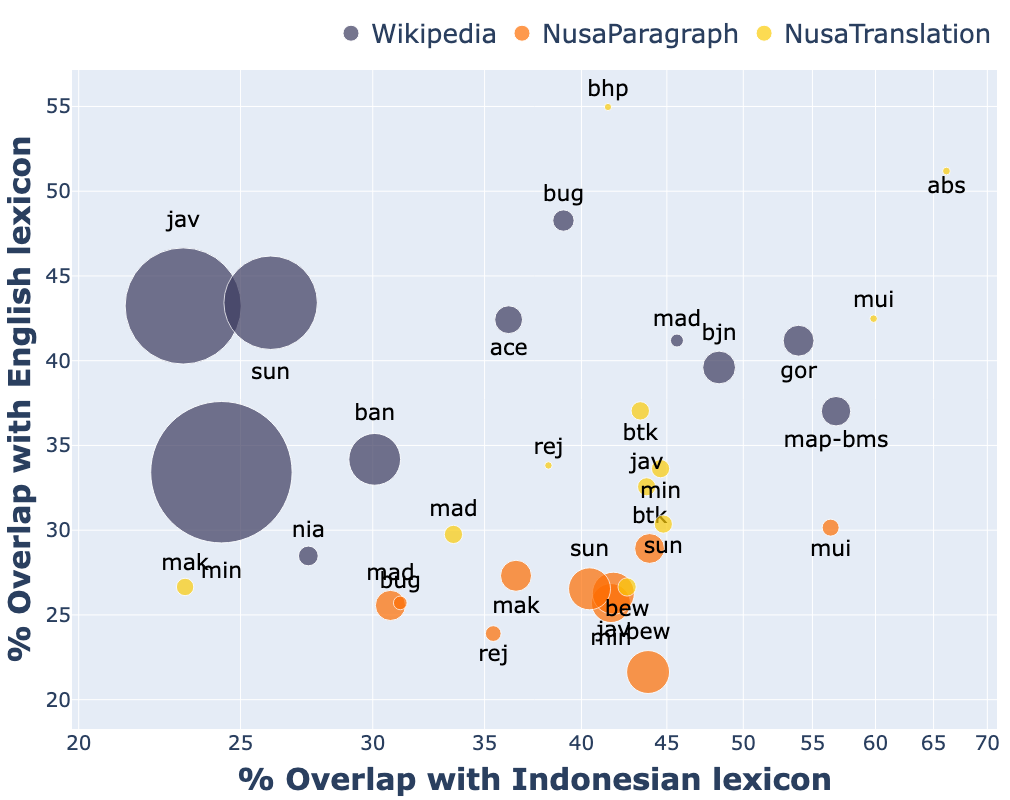

In [7]:
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)

def improve_text_position(x):
    """ it is more efficient if the x values are sorted """
    positions = ['top center', 'bottom center']  # you can add more: left center ...
    return [positions[i % len(positions)] for i in range(len(x))]

fig = px.scatter(df, x=x, y=y,
	         size="token_size", color="type",
                 color_discrete_sequence=["#3c3b5f", "#fe6e02", "#fbcc0a"],
                 text="lang", log_x=True, size_max=100)

fig.update_traces(textposition=improve_text_position(df["lang"]), mode="markers+text", textfont=dict(size=22,color='black'))

fig.update_layout(
    xaxis=dict(
        title='<b>% Overlap with Indonesian lexicon</b>',
        gridcolor='white',
        type='log',
        gridwidth=1,
        titlefont=dict(size=30),
        tickfont_size=20,
    ),
    yaxis=dict(
        title='<b>% Overlap with English lexicon</b>',
        gridcolor='white',
        gridwidth=1,
        titlefont=dict(size=30),
        tickfont_size=20,
    ),
    legend=dict(
        font=dict(size=26),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
        title="",
        itemsizing="trace",
    ),
    width=800,
    height=800,
    margin=dict(l=10, r=10, t=10, b=10),
)
fig.show()

## Statistics

In [8]:
tokens_df = pd.read_csv("tokens.csv")
unique_tokens_df = pd.read_csv("unique_tokens.csv")
token_per_docs_df = pd.read_csv("token_per_docs.csv")

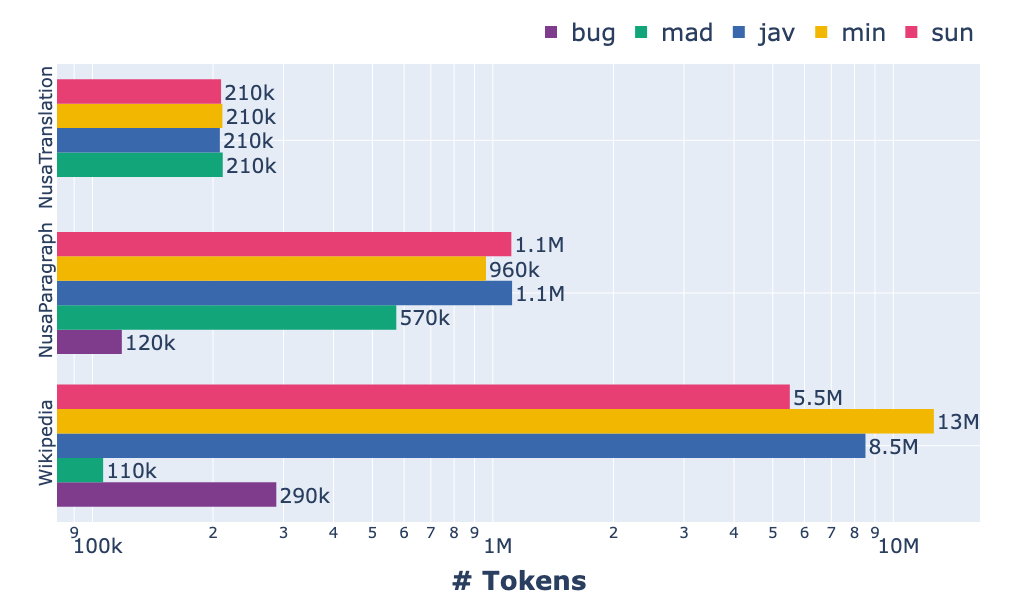

In [12]:
fig = px.histogram(tokens_df, x="tokens", y="type",
    color='lang', barmode='group', orientation='h', text_auto=".2s",
    color_discrete_sequence=px.colors.qualitative.Bold,
    height=400)
fig.update_traces(textfont_size=22, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(
    xaxis=dict(
        title='<b># Tokens</b>',
        gridcolor='white',
        type='log',
        gridwidth=1,
        titlefont=dict(size=26),
        tickfont_size=20,
    ),
    yaxis=dict(
        gridcolor='white',
        gridwidth=1,
        titlefont=dict(size=26),
        tickfont_size=18,
        tickangle=-90,
        title="",
    ),
    margin=dict(l=10, r=30, t=10, b=10),
    legend=dict(
        font=dict(size=24),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
        title="",
        itemsizing="constant",
    ),
    height=600, width=600, title_text="")
fig.show()

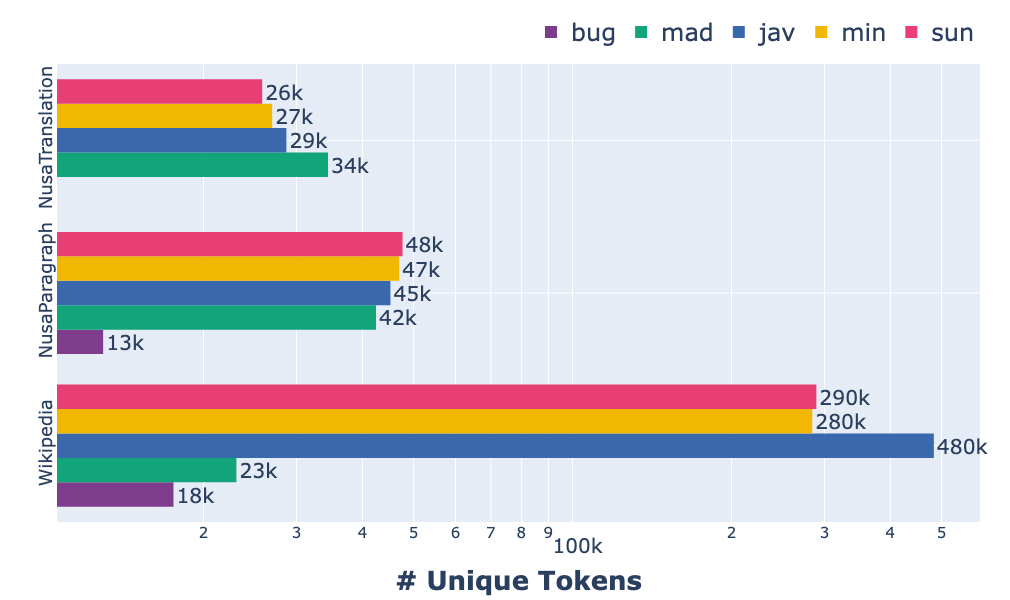

In [13]:
fig = px.histogram(unique_tokens_df, x="unique_tokens", y="type",
    color='lang', barmode='group', orientation='h', text_auto=".2s",
    color_discrete_sequence=px.colors.qualitative.Bold,
    height=400)
fig.update_traces(textfont_size=22, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(
    xaxis=dict(
        title='<b># Unique Tokens</b>',
        gridcolor='white',
        type='log',
        gridwidth=1,
        titlefont=dict(size=26),
        tickfont_size=20,
    ),
    yaxis=dict(
        gridcolor='white',
        gridwidth=1,
        titlefont=dict(size=26),
        tickfont_size=18,
        tickangle=-90,
        title="",
    ),
    legend=dict(
        font=dict(size=24),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
        title="",
        itemsizing="constant",
    ),
    margin=dict(l=10, r=30, t=10, b=10),
    height=600, width=600, title_text="")
fig.show()

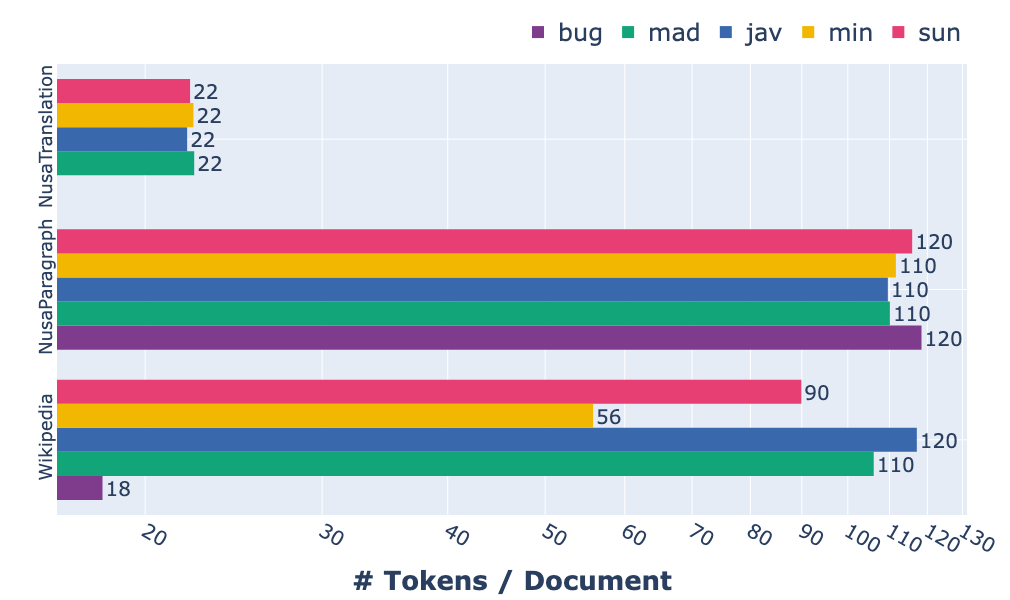

In [14]:
fig = px.histogram(token_per_docs_df, x="tokens_per_doc", y="type",
    color='lang', barmode='group', orientation='h', text_auto=".2s",
    color_discrete_sequence=px.colors.qualitative.Bold,
    height=400)
fig.update_traces(textfont_size=22, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(
    xaxis=dict(
        title='<b># Tokens / Document</b>',
        gridcolor='white',
        type='log',
        gridwidth=1,
        titlefont=dict(size=26),
        tickfont_size=20,
    ),
    yaxis=dict(
        gridcolor='white',
        gridwidth=1,
        titlefont=dict(size=26),
        tickfont_size=18,
        tickangle=-90,
        title="",
    ),
    legend=dict(
        font=dict(size=24),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
        title="",
        itemsizing="constant",
    ),
    margin=dict(l=10, r=10, t=10, b=10),
    height=600, width=600, title_text="")
fig.show()

## Lexical Diversity

In [15]:
lex_div_df = pd.read_csv("lexical_diversity.csv")

In [16]:
lex_div_df

,lang,dset,mattr,mtld,msttr
0,bug,Wikipedia,0.798077,28.606776,0.801241
1,bug,NusaParagraph,0.905118,75.994011,0.898703
2,bug,NusaTranslation,0.000000,0.000000,0.000000
3,mad,Wikipedia,0.898814,67.208603,0.910579
4,mad,NusaParagraph,0.911224,73.295795,0.902920
5,mad,NusaTranslation,0.922222,71.487527,0.921750
6,jav,Wikipedia,0.891772,58.936400,0.897437
7,jav,NusaParagraph,0.893373,58.154803,0.883922
8,jav,NusaTranslation,0.926253,72.576000,0.924603
9,min,Wikipedia,0.942308,80.864000,0.924250


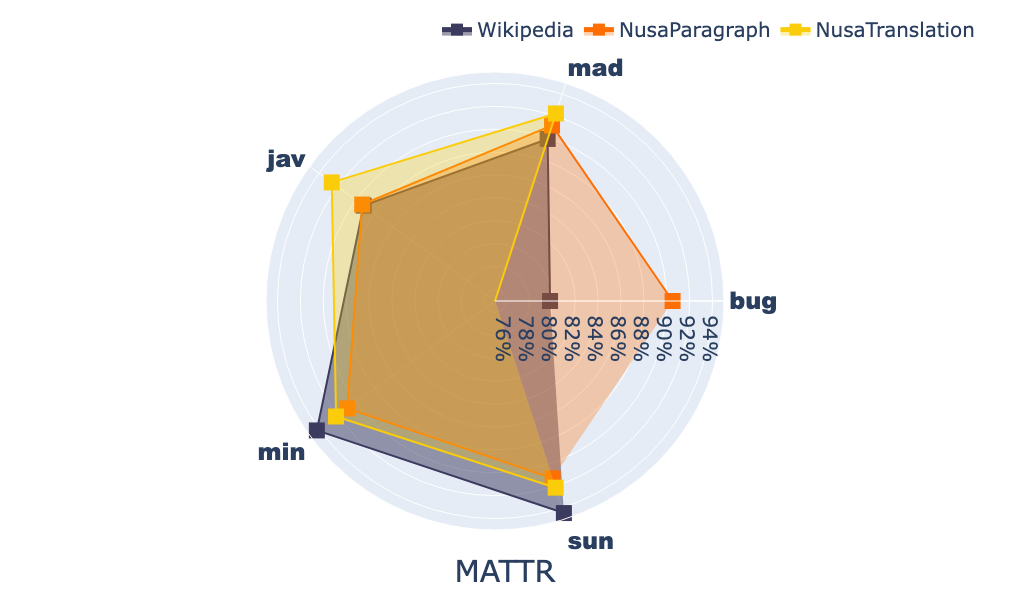

In [18]:
import plotly.graph_objects as go

categories = lex_div_df["lang"].unique()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=lex_div_df[lex_div_df["dset"] == "Wikipedia"]["mattr"],
    theta=categories,
    fill='toself',
    fillcolor="rgba(60, 59, 95, 0.5)",
    line_color="#3c3b5f",
    name='Wikipedia'
))
fig.add_trace(go.Scatterpolar(
    r=lex_div_df[lex_div_df["dset"] == "NusaParagraph"]["mattr"],
    theta=categories,
    fill='toself',
    fillcolor="rgba(254, 111, 2, 0.3)",
    line_color="#fe6e02",
    name='NusaParagraph'
))
fig.add_trace(go.Scatterpolar(
    r=lex_div_df[lex_div_df["dset"] == "NusaTranslation"]["mattr"],
    theta=categories,
    fill='toself',
    fillcolor="rgba(251, 204, 10, 0.3)",
    line_color="#fbcc0a",
    name='NusaTranslation'
))

fig.update_traces(mode = "lines+markers",
    marker = dict(
        size = 16, symbol="square"
    ))

fig.update_layout(
  polar=dict(
      radialaxis_tickfont_size = 20,
    radialaxis=dict(
      visible=True,
      range=[0.75, 0.95],
       tickformat = '.0%'
    ), angularaxis = dict(
        tickfont_size=24, tickfont_family="Arial Black"
        # rotation=90, # start position of angular axis
        # direction="counterclockwise"
      )),
    legend=dict(
        font=dict(size=20),
        orientation="h",
        yanchor="bottom",
        y=1.05,
        xanchor="right",
        x=1,
        title="",
        itemsizing="constant",
    ),
    margin=dict(l=10, r=30, t=70, b=70),
    height=600, width=600, title_text="MATTR", title_font_size=30,
    title_xanchor='center', title_yanchor="bottom", title_x=0.5, title_y=0.03
)

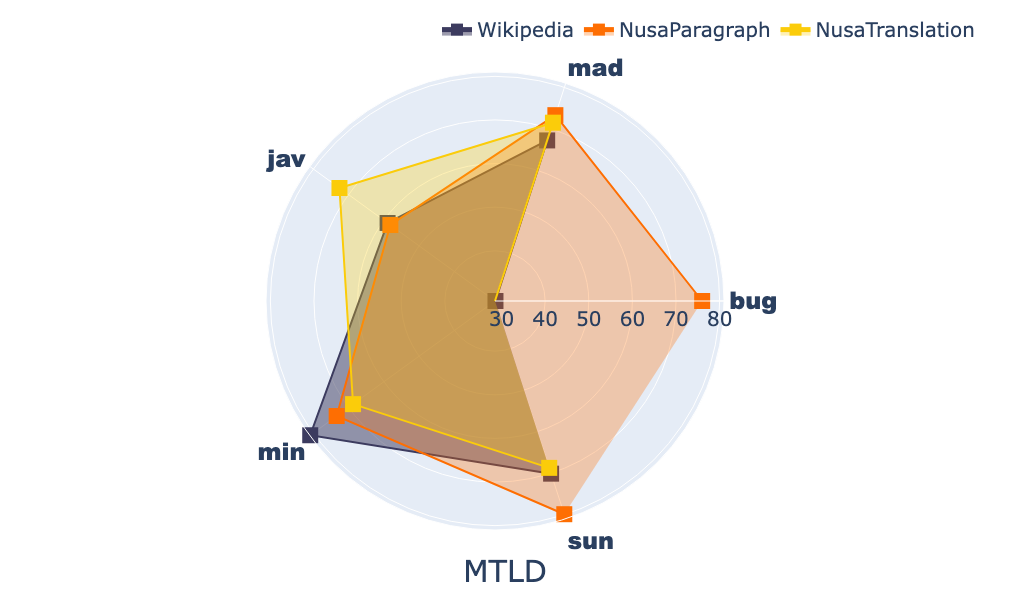

In [19]:
import plotly.graph_objects as go

categories = lex_div_df["lang"].unique()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=lex_div_df[lex_div_df["dset"] == "Wikipedia"]["mtld"],
    theta=categories,
    fill='toself',
    fillcolor="rgba(60, 59, 95, 0.5)",
    line_color="#3c3b5f",
    name='Wikipedia'
))
fig.add_trace(go.Scatterpolar(
    r=lex_div_df[lex_div_df["dset"] == "NusaParagraph"]["mtld"],
    theta=categories,
    fill='toself',
    fillcolor="rgba(254, 111, 2, 0.3)",
    line_color="#fe6e02",
    name='NusaParagraph'
))
fig.add_trace(go.Scatterpolar(
    r=lex_div_df[lex_div_df["dset"] == "NusaTranslation"]["mtld"],
    theta=categories,
    fill='toself',
    fillcolor="rgba(251, 204, 10, 0.3)",
    line_color="#fbcc0a",
    name='NusaTranslation'
))

fig.update_traces(mode = "lines+markers",
    marker = dict(
        size = 16, symbol="square"
    ))

fig.update_layout(
  polar=dict(
      radialaxis_tickfont_size = 20,
    radialaxis=dict(
      visible=True,
      range=[28.5, 81],
    ), angularaxis = dict(
        tickfont_size=24, tickfont_family="Arial Black"
        # rotation=90, # start position of angular axis
        # direction="counterclockwise"
      )),
    legend=dict(
        font=dict(size=20),
        orientation="h",
        yanchor="bottom",
        y=1.05,
        xanchor="right",
        x=1,
        title="",
        itemsizing="constant",
    ),
    margin=dict(l=10, r=30, t=70, b=70),
    height=600, width=600, title_text="MTLD", title_font_size=30,
    title_xanchor='center', title_yanchor="bottom", title_x=0.5, title_y=0.03
)

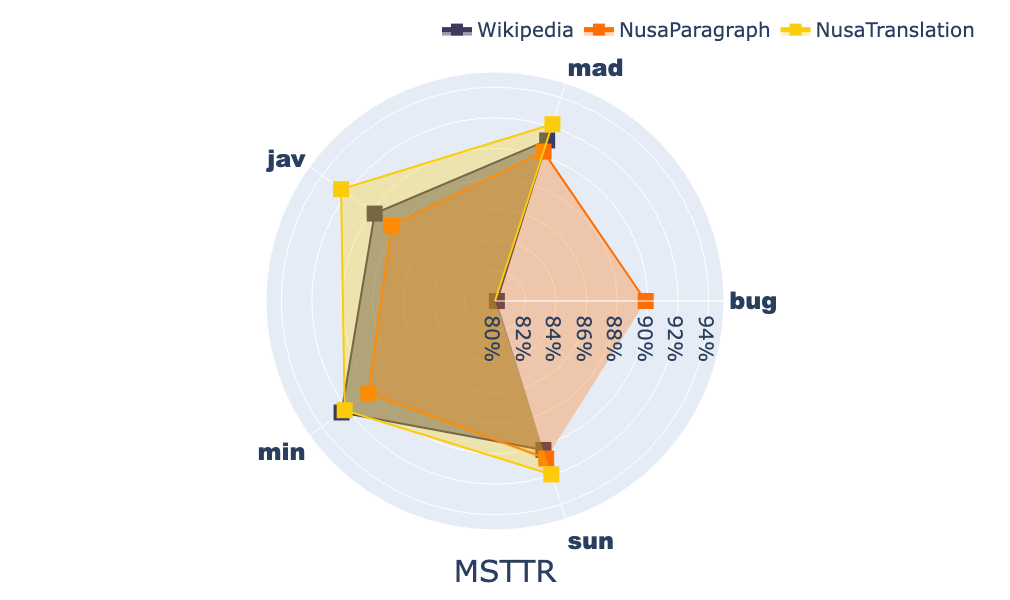

In [20]:
import plotly.graph_objects as go

categories = lex_div_df["lang"].unique()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=lex_div_df[lex_div_df["dset"] == "Wikipedia"]["msttr"],
    theta=categories,
    fill='toself',
    fillcolor="rgba(60, 59, 95, 0.5)",
    line_color="#3c3b5f",
    name='Wikipedia'
))
fig.add_trace(go.Scatterpolar(
    r=lex_div_df[lex_div_df["dset"] == "NusaParagraph"]["msttr"],
    theta=categories,
    fill='toself',
    fillcolor="rgba(254, 111, 2, 0.3)",
    line_color="#fe6e02",
    name='NusaParagraph'
))
fig.add_trace(go.Scatterpolar(
    r=lex_div_df[lex_div_df["dset"] == "NusaTranslation"]["msttr"],
    theta=categories,
    fill='toself',
    fillcolor="rgba(251, 204, 10, 0.3)",
    line_color="#fbcc0a",
    name='NusaTranslation'
))

fig.update_traces(mode = "lines+markers",
    marker = dict(
        size = 16, symbol="square"
    ))

fig.update_layout(
  polar=dict(
      radialaxis_tickfont_size = 20,
    radialaxis=dict(
      visible=True,
      range=[0.8, 0.95],
       tickformat = '.0%'
    ), angularaxis = dict(
        tickfont_size=24, tickfont_family="Arial Black"
        # rotation=90, # start position of angular axis
        # direction="counterclockwise"
      )),
    legend=dict(
        font=dict(size=20),
        orientation="h",
        yanchor="bottom",
        y=1.05,
        xanchor="right",
        x=1,
        title="",
        itemsizing="constant",
    ),
    margin=dict(l=10, r=30, t=70, b=70),
    height=600, width=600, title_text="MSTTR", title_font_size=30,
    title_xanchor='center', title_yanchor="bottom", title_x=0.5, title_y=0.03
)

## NLU per language

In [271]:
nlu_df = pd.read_csv("nlu_per_lang.csv")
nlu_df.head()

,type,model,lang,performance,performance__pct
0,Classical,LR,abs,0.592,59.2
1,Classical,LR,bew,0.760,76.0
2,Classical,LR,bhp,0.517,51.7
3,Classical,LR,btk,0.739,73.9
4,Classical,LR,bug,0.637,63.7


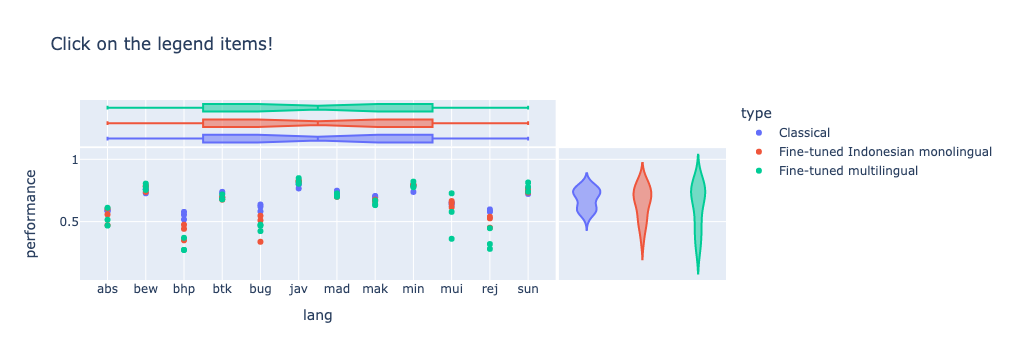

In [272]:
import plotly.express as px

fig = px.scatter(nlu_df, x="lang", y="performance", color="type", 
                 marginal_x="box", marginal_y="violin",
                  title="Click on the legend items!")
fig.show()

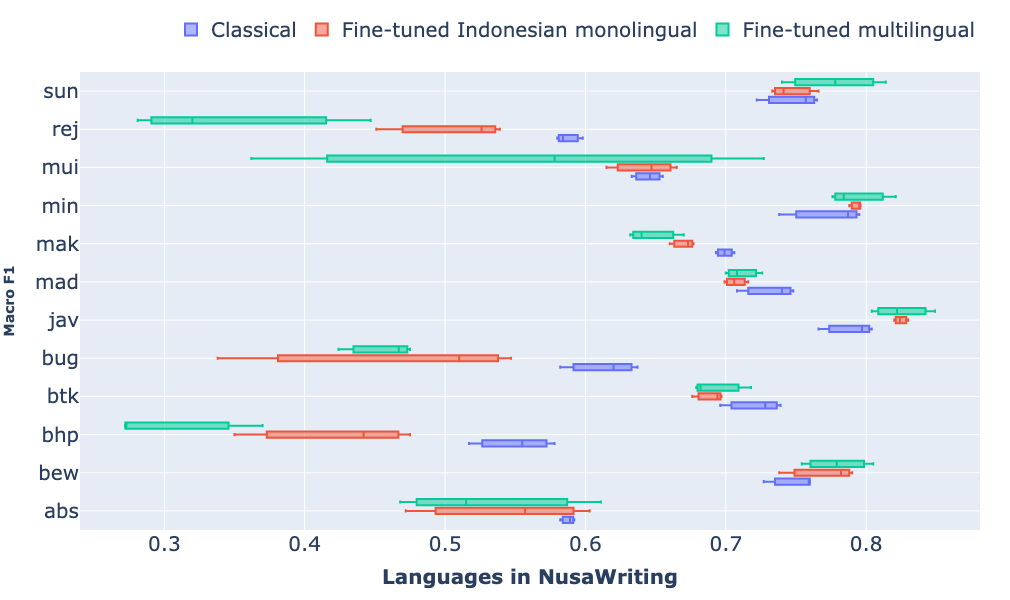

In [273]:
import plotly.express as px

fig = px.box(nlu_df, x="performance", y="lang", color="type") #, points='all')
# fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(
    xaxis=dict(
        title='<b>Languages in NusaWriting</b>',
        gridcolor='white',
        # type='log',
        gridwidth=1,
        titlefont=dict(size=20),
        tickfont_size=20,
    ),
    yaxis=dict(
        gridcolor='white',
        gridwidth=1,
        titlefont=dict(size=20),
        tickfont_size=20,
        title="<b>Macro F1</b>",
    ),
    legend=dict(
        font=dict(size=20),
        orientation="h",
        yanchor="bottom",
        y=1.05,
        xanchor="right",
        x=1,
        title="",
        itemsizing="constant",
    ),
    margin=dict(l=10, r=30, t=70, b=70),
    height=600, width=800,
)
fig.show()

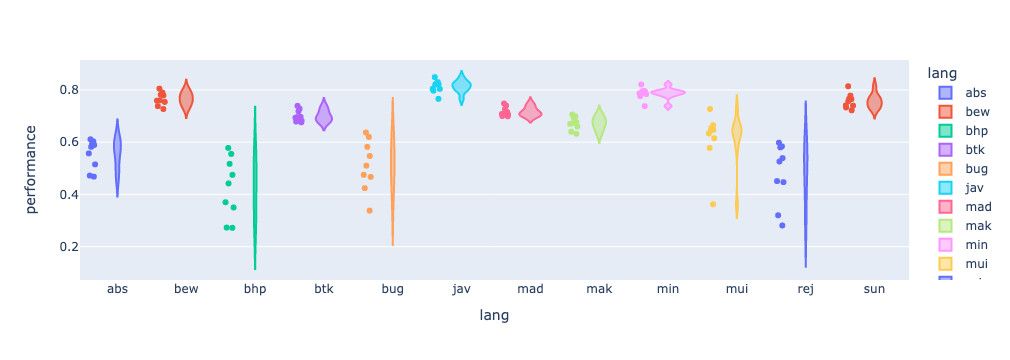

In [274]:
import plotly.express as px

fig = px.violin(nlu_df, x="lang", y="performance", color="lang", points="all")
# fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

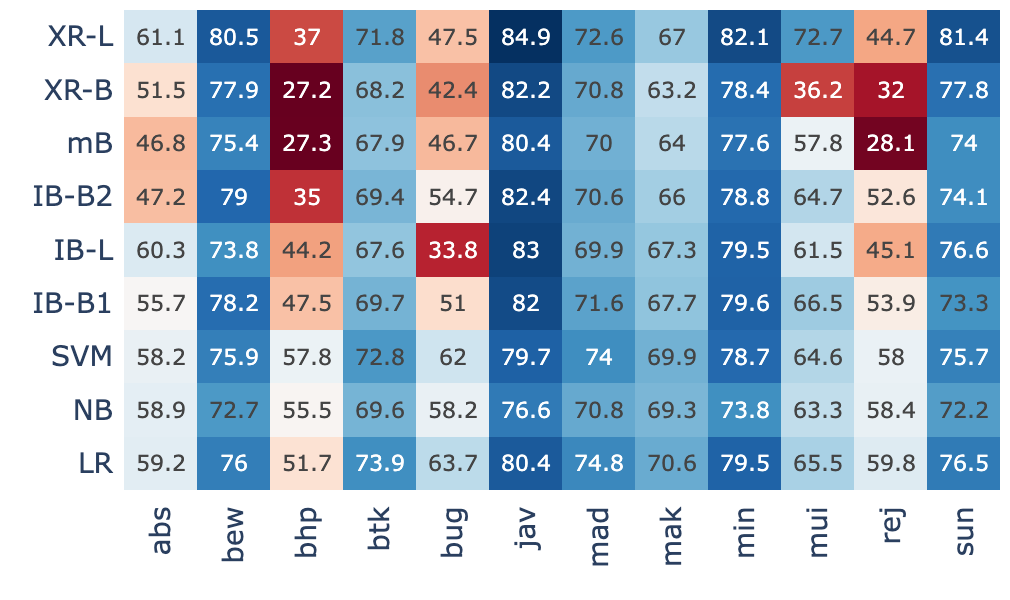

In [291]:
fig = px.density_heatmap(nlu_df, x="lang", y="model", z="performance__pct",
                         text_auto=True, color_continuous_scale="RdBu")
fig.update_traces(textfont=dict(size=22))
fig.update_layout(
    xaxis=dict(
        title='',
        gridcolor='white',
        # type='log',
        gridwidth=1,
        titlefont=dict(size=24),
        tickfont_size=28,
        tickangle=-90,
    ),
    yaxis=dict(
        gridcolor='white',
        gridwidth=1,
        title="",
        titlefont=dict(size=24),
        tickfont_size=28,
        # tickangle=45,
    ),
    # legend=dict(
    #     font=dict(size=20),
    #     orientation="h",
    #     yanchor="bottom",
    #     y=1.05,
    #     xanchor="right",
    #     x=1,
    #     title="",
    #     itemsizing="constant",
    # ),
    coloraxis_showscale=False,
    margin=dict(l=0, r=10, t=10, b=0, pad=10),
    height=600, width=800,
    template='plotly_white',
)
fig.show()

## LM Quality

In [21]:
lmq_df = pd.read_csv("lm_quality.csv")
lmq_df.head()

,set,method,language,ppl,log(perplexity),Unnamed: 5,Unnamed: 6,ppl.1,Unnamed: 8,Unnamed: 9
0,balanced,Wiki,bug,5356,8.586,NaN,NaN,5356.15,NaN,NaN
1,balanced,Wiki,mad,3909,8.271,NaN,NaN,3908.86,NaN,NaN
2,balanced,Wiki,jav,5356,8.586,NaN,NaN,5356.15,NaN,NaN
3,balanced,Wiki,min,3291,8.099,AVG no bug,AVG w/ bug,3291.18,AVG no bug,AVG w/ bug
4,balanced,Wiki,sun,6621,8.798,8.4385,8.468,6620.99,4794.29,4906.66


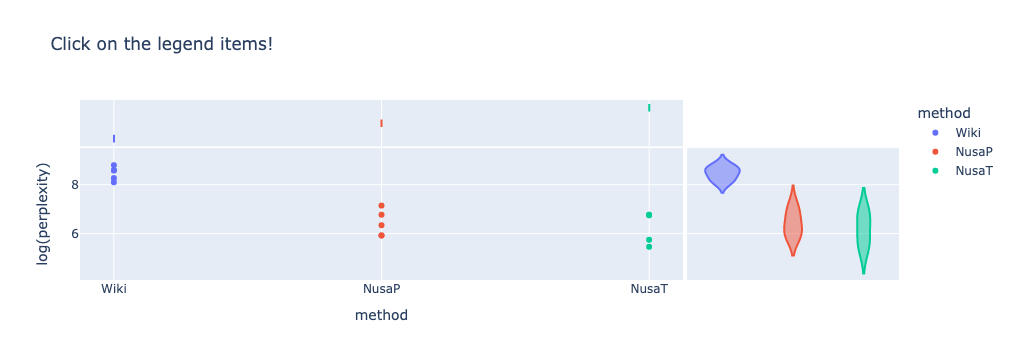

In [22]:
import plotly.express as px

fig = px.scatter(lmq_df[lmq_df["set"] == "balanced"], x="method", y="log(perplexity)", color="method", 
                 marginal_x="box", marginal_y="violin",
                  title="Click on the legend items!")
fig.show()

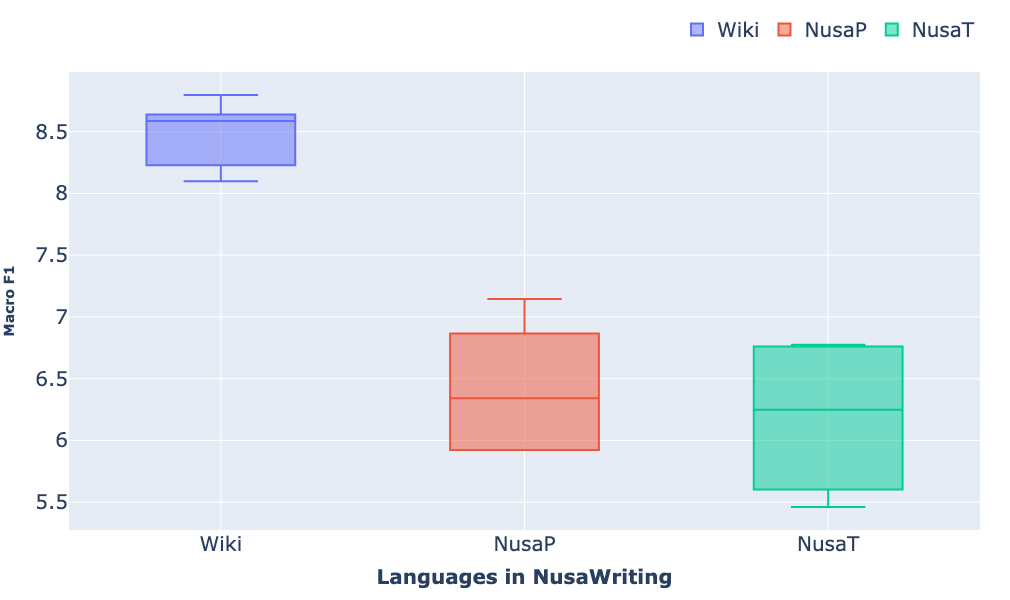

In [23]:
import plotly.express as px

fig = px.box(lmq_df[lmq_df["set"] == "balanced"], x="method", y="log(perplexity)", color="method") #, points='all')
# fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(
    xaxis=dict(
        title='<b>Languages in NusaWriting</b>',
        gridcolor='white',
        # type='log',
        gridwidth=1,
        titlefont=dict(size=20),
        tickfont_size=20,
    ),
    yaxis=dict(
        gridcolor='white',
        gridwidth=1,
        titlefont=dict(size=20),
        tickfont_size=20,
        title="<b>Macro F1</b>",
    ),
    legend=dict(
        font=dict(size=20),
        orientation="h",
        yanchor="bottom",
        y=1.05,
        xanchor="right",
        x=1,
        title="",
        itemsizing="constant",
    ),
    margin=dict(l=10, r=30, t=70, b=70),
    height=600, width=800,
)
fig.show()

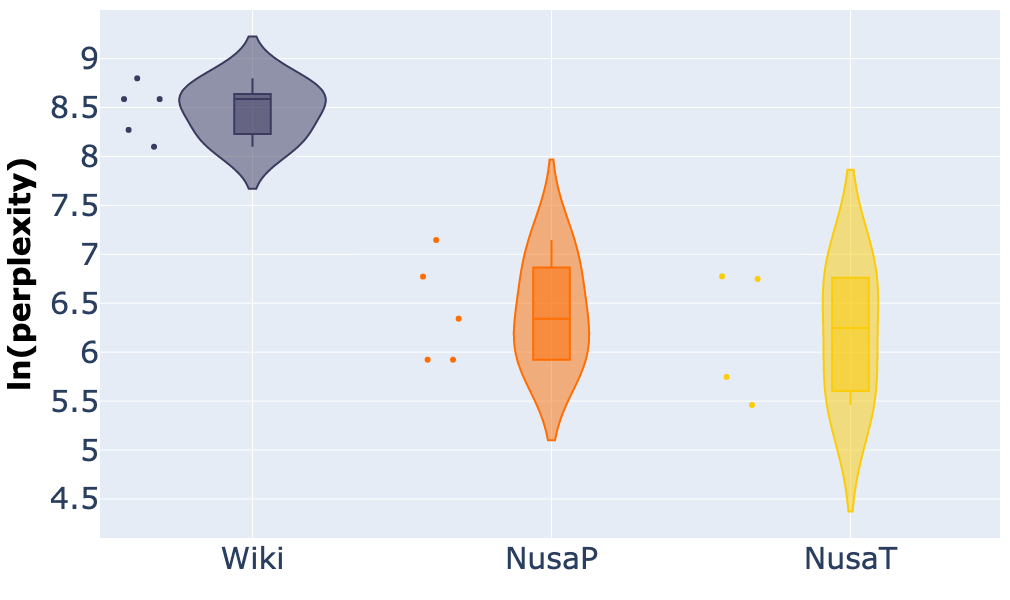

In [24]:
import plotly.express as px

fig = px.violin(lmq_df[lmq_df["set"] == "balanced"], x="method", y="log(perplexity)",
                color="method", points="all", box=True, color_discrete_sequence=["#3c3b5f", "#fe6e02", "#fbcc0a"])
# fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.update_layout(
    xaxis=dict(
        gridcolor='white',
        # type='log',
        gridwidth=1,
        titlefont=dict(size=1),
        tickfont_size=30,
        title="",
    ),
    yaxis=dict(
        gridcolor='white',
        gridwidth=1,
        titlefont=dict(size=26),
        tickfont_size=30,
        # tickangle=-90,
        dtick=0.5,
        title="<span style='font-size:30px;color:black;'><b>ln(perplexity)</b></span>",
    ),
    # legend=dict(
    #     font=dict(size=20),
    #     orientation="h",
    #     yanchor="bottom",
    #     y=1.05,
    #     xanchor="right",
    #     x=1,
    #     title="",
    #     itemsizing="constant",
    # ),
    showlegend=False,
    margin=dict(l=100, r=10, t=10, b=0),
    height=600, width=500,
)
fig.show()

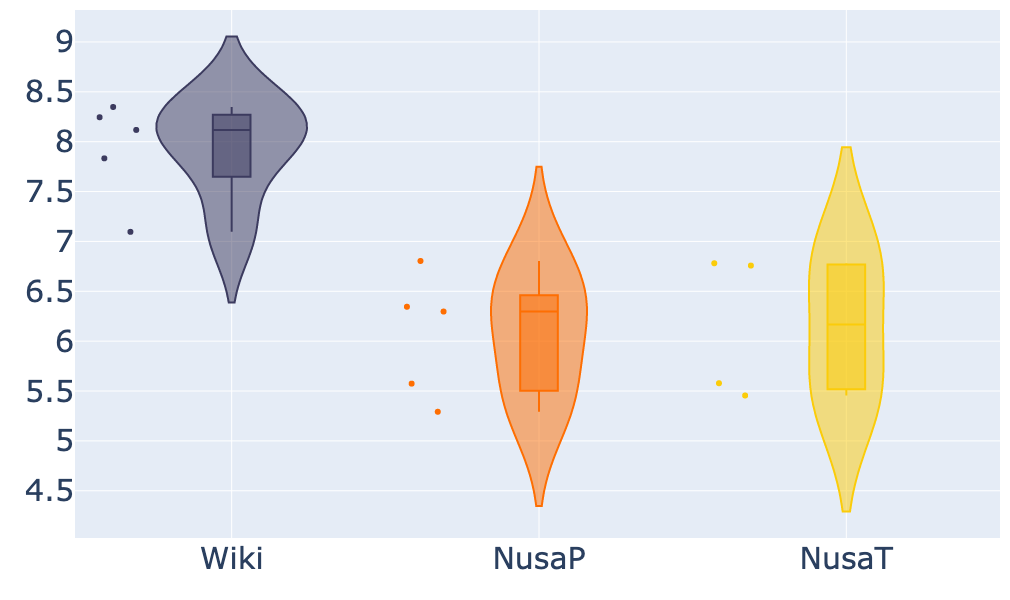

In [25]:
import plotly.express as px

fig = px.violin(lmq_df[lmq_df["set"] == "full"], x="method", y="log(perplexity)",
                color="method", points="all", box=True, color_discrete_sequence=["#3c3b5f", "#fe6e02", "#fbcc0a"])
# fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.update_layout(
    xaxis=dict(
        gridcolor='white',
        # type='log',
        gridwidth=1,
        titlefont=dict(size=1),
        tickfont_size=30,
        title="",
    ),
    yaxis=dict(
        gridcolor='white',
        gridwidth=1,
        titlefont=dict(size=1),
        tickfont_size=30,
        # tickangle=-90,
        dtick=0.5,
        title="",
    ),
    # legend=dict(
    #     font=dict(size=20),
    #     orientation="h",
    #     yanchor="bottom",
    #     y=1.05,
    #     xanchor="right",
    #     x=1,
    #     title="",
    #     itemsizing="constant",
    # ),
    showlegend=False,
    margin=dict(l=0, r=10, t=10, b=0),
    height=600, width=400,
)
fig.show()